In [25]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
os.chdir('C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis')
os.getcwd()

'C:\\Users\\pares\\Downloads\\ds_questions\\ds_questions\\massandopolis'

In [27]:
#what's my data?
all_files = glob.glob('*.csv')
all_files

['allergies.csv',
 'careplans.csv',
 'concepts.csv',
 'conditions.csv',
 'encounters.csv',
 'imaging_studies.csv',
 'immunizations.csv',
 'medications.csv',
 'observations.csv',
 'organizations.csv',
 'patients.csv',
 'patients_updated.csv',
 'procedures.csv',
 'providers.csv']

Since, I'm dealing with medical records of different patients, their careplans, their allergies, hospitals and health care providers, let's start with understanding the people. Who are they?

In [28]:
patients = pd.read_csv('patients.csv')
patients.info()
patients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 23 columns):
Id            8360 non-null object
BIRTHDATE     8360 non-null object
DEATHDATE     3360 non-null object
SSN           8360 non-null object
DRIVERS       7166 non-null object
PASSPORT      6815 non-null object
PREFIX        6998 non-null object
FIRST         8360 non-null object
LAST          8360 non-null object
SUFFIX        83 non-null object
MAIDEN        2352 non-null object
MARITAL       6216 non-null object
RACE          8360 non-null object
ETHNICITY     8360 non-null object
GENDER        8360 non-null object
BIRTHPLACE    8360 non-null object
ADDRESS       8360 non-null object
CITY          8360 non-null object
STATE         8360 non-null object
ZIP           8259 non-null float64
eventtime     8360 non-null float64
status        8360 non-null int64
trt           8360 non-null int64
dtypes: float64(2), int64(2), object(19)
memory usage: 1.5+ MB


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,ZIP,eventtime,status,trt
0,c0d528b6-cdae-4d98-8936-a270f8827eb7,2013-02-10,NaN,999-83-3170,NaN,NaN,NaN,Claudette391,Hahn503,NaN,NaN,NaN,white,french_canadian,F,Framingham Massandopolis US,239 Schaden Glen,Randolph,Massandopolis,2368.0,2.770027,1,0
1,d709f84f-7d2c-440b-a979-2bc27d41f63a,1994-01-10,2019-01-07,999-31-7937,S99989196,X43239863X,Ms.,Christina143,Langworth352,NaN,NaN,NaN,black,dominican,F,Lynn Massandopolis US,535 Romaguera Annex Unit 82,Boston,Massandopolis,2108.0,2.973888,1,0
2,92aa6efc-004f-4e01-b0be-9aafa40d9857,1989-08-27,NaN,999-59-2188,S99973592,X80581589X,Mrs.,Robbyn526,Eichmann909,NaN,Kohler843,M,hispanic,central_american,F,Salem Massandopolis US,986 Franecki Road Apt 37,Bellingham,Massandopolis,2019.0,11.044932,1,1
3,f9b11b47-e8e8-4c3c-b279-36eba5086cfd,1988-10-09,NaN,999-48-9512,S99947146,X80365010X,Mr.,Earnest658,Bauch723,NaN,NaN,M,white,american,M,Concord Massandopolis US,451 Paucek Divide,Plymouth,Massandopolis,2360.0,7.396326,1,1
4,c9d19013-4435-4b71-823a-c5023ba56195,1997-12-21,NaN,999-44-8705,S99938855,X28806996X,Mr.,Sung603,Schroeder447,NaN,NaN,NaN,white,polish,M,Reading Massandopolis US,123 Klocko Gateway,Natick,Massandopolis,1760.0,7.882326,1,0


In [29]:
#correcting the data-types and column format
patients.columns = [i.lower() for i in patients.columns]
patients.birthdate = patients.birthdate.apply(pd.to_datetime)
patients.deathdate = patients.deathdate.apply(pd.to_datetime)

### From this data/variables - what information can we gain about the population?

- Population Age (We have DOB/DOD of more than 3,000 patients). Also patients with missing DOD, are they missing because they are still alive or because we didn't collect that information?
- People with passports - Only 42% Americans have passports as of now (it was around 10% in 1990s). Can it tell us something about patients' financial status (their ability to fly outside country)?
- Population demographics (thier race, gender, ethinicity, marital)
- Since we have patients from different eras/timelines/decades, we can look at birth rate, mortality rate (Did specific year/decade experience more deaths?), life expectancy of different segments in different decades.
- What city/state do people live? How are the conditions in those areas?
- Understand what decade/ year/ societal segment do we the most data for. Eliminate those with very less data points.


In [30]:
#How many patients do we have? - We have 2 unique identifiers
patients.id.nunique()

8360

In [31]:
patients.ssn.nunique()

8315

Ok. we have 8,360 different patients, but 45 of them have duplicate ssn. Need further investigation.

In [32]:
dup_ssn = patients.loc[patients.ssn.duplicated(keep = False)]
dup_ssn = dup_ssn.sort_values(['ssn'])
dup_ssn.set_index('ssn',inplace = True)
#dup_ssn.index = dup_ssn.index.where(~dup_ssn.index.duplicated(),'')
dup_ssn.head()

,id,birthdate,deathdate,drivers,passport,prefix,first,last,suffix,maiden,marital,race,ethnicity,gender,birthplace,address,city,state,zip,eventtime,status,trt
ssn,,,,,,,,,,,,,,,,,,,,,,
999-11-7325,39010c13-45d6-4076-930c-a17dbbd03f5b,1937-08-24,2010-07-13,S99915000,X47088213X,Mrs.,Veda284,Hodkiewicz467,NaN,Ruecker817,M,white,irish,F,Boston Massandopolis US,833 Ritchie Vista,Plymouth,Massandopolis,2360.0,4.278910,1,0
999-11-7325,7bb7dab2-c7e5-4f8a-9c4e-bc90292611fc,1916-03-08,1990-10-27,S99953881,X59181764X,Mr.,Graig740,Kunze215,NaN,NaN,S,black,african,M,Phillipston Massandopolis US,338 Moen Bridge,Quincy,Massandopolis,2169.0,7.997818,1,1
999-21-5198,18dc536c-f86c-4443-8329-ded301c00703,1913-11-09,1967-04-03,S99965386,X54882958X,Mr.,Jared66,Russel238,NaN,NaN,M,white,irish,M,Dracut Massandopolis US,622 Marvin Throughway Suite 63,Greenfield Town,Massandopolis,1301.0,2.223956,1,1
999-21-5198,b0aa0bd6-9692-43e8-8053-a2a47be22abf,1950-04-30,NaT,S99990642,X20122990X,Mr.,Shon148,Quigley282,NaN,NaN,M,white,italian,M,Weston Massandopolis US,134 Mueller Terrace,Cambridge,Massandopolis,2138.0,5.440939,1,0
999-26-7890,08235ec2-7b4d-4c8f-ad23-a6e569e6978f,1925-02-02,2010-11-08,S99975372,X54597308X,Mrs.,Jimmy858,Conroy74,NaN,Weber641,M,black,west_indian,F,Sterling Massandopolis US,1081 Welch Green Unit 96,Boston,Massandopolis,2108.0,8.217135,1,1


In [33]:
dup_ssn.groupby(dup_ssn.index)['birthdate'].nunique()

ssn
999-11-7325    2
999-21-5198    2
999-26-7890    2
999-28-3297    2
999-28-8170    2
999-29-8786    2
999-30-7479    2
999-31-1079    2
999-32-7054    2
999-34-1539    2
999-34-9211    2
999-35-8283    2
999-36-9162    2
999-37-6434    2
999-38-7174    2
999-39-7246    2
999-40-3704    2
999-40-8252    2
999-41-5015    2
999-42-5642    2
999-43-3421    2
999-50-6053    2
999-51-4959    2
999-51-6815    2
999-51-8809    2
999-52-3402    2
999-55-9771    2
999-57-1629    2
999-57-2011    2
999-63-2000    2
999-64-8033    2
999-68-6130    2
999-70-6601    2
999-76-3213    2
999-79-2743    2
999-79-6285    2
999-83-7115    2
999-85-1064    2
999-87-8448    2
999-89-9021    2
999-91-8712    2
999-92-9649    2
999-93-1429    2
999-96-6208    2
999-99-1717    2
Name: birthdate, dtype: int64

Everyone has a unique name and a unique birthdate. Then why similar ssn's? Having a similar name/ DOB/ phone number might cause duplication, but we dont have any such issue. Looks like, either of these 90 people mis-reported their numbers! We might need to contact these customers.


In [34]:
patients['birth_year'] = patients.birthdate.dt.year
patients['death_year'] = patients.deathdate.dt.year

In [35]:
#Why are D.O.D missing? To find this out, we need to understand how D.O.D is collected. 
(patients.loc[patients.death_year.isnull(),'birth_year'].value_counts().sort_index()).head()

1926     2
1927     1
1928     2
1929    18
1930    21
Name: birth_year, dtype: int64

Ok. So, the oldest patient with missing DOD is 94 years old. This is still a valid age. Looking at the bigger picture,and assuming a lot of the patients signing up with a company like picnicHealth, should generally be alive. Therefore, lets just trust the company and assume the missing DOD is due to people being alive! Although, I'd like to verify this, but for now lets move on with this.

In [36]:
#Approx. age
patients['age'] = patients.death_year.fillna(2020) - patients.birth_year

In [37]:
patients[['age','birth_year','death_year']].describe()

,age,birth_year,death_year
count,8360.000000,8360.000000,3360.000000
mean,48.274282,1962.148206,1996.170238
std,24.538316,29.544465,19.148925
min,-15.000000,1908.000000,1912.000000
25%,27.000000,1935.000000,1989.000000
50%,52.000000,1961.000000,2001.000000
75%,68.000000,1987.000000,2010.000000
max,100.000000,2019.000000,2022.000000


Few observations:
- An average age of 48 years is fairly low. There seems to be an issue of healthcare in the city of Massandapolis.
- Woah. A negative age!
- Another woah. A death year in 2022? Looks like, someone already made a time-machine. Jonas, is that you?

In [38]:
pd.set_option('display.max_columns',None)
patients.loc[patients.age < 0]

,id,birthdate,deathdate,ssn,drivers,passport,prefix,first,last,suffix,maiden,marital,race,ethnicity,gender,birthplace,address,city,state,zip,eventtime,status,trt,birth_year,death_year,age
1092,f274e59b-681e-45fa-89f5-7ef6bd291b4c,2003-11-12,1988-11-27,999-10-3307,NaN,NaN,NaN,Shawn523,Koch169,NaN,NaN,NaN,white,irish,M,Springfield Massandopolis US,978 O'Connell Underpass Apt 25,Hanson,Massandopolis,2341.0,4.499605,1,1,2003,1988.0,-15.0
5377,82186679-c053-4d63-b66e-fc082c59ea03,1971-07-17,1957-02-02,999-62-9908,NaN,NaN,NaN,Lashay246,Huel628,NaN,NaN,NaN,white,french,F,Cambridge Massandopolis US,109 Schiller Grove Suite 92,Milford,Massandopolis,1757.0,16.555955,1,1,1971,1957.0,-14.0


Either they reported their DOB incorrectly or there DOD (they might still be alive and reported an obvious fake date of death!)

In [39]:
patients.loc[patients.death_year > 2020]

,id,birthdate,deathdate,ssn,drivers,passport,prefix,first,last,suffix,maiden,marital,race,ethnicity,gender,birthplace,address,city,state,zip,eventtime,status,trt,birth_year,death_year,age
1782,244dcbc3-931b-4b60-a2dd-607ee6c5abd9,1946-03-02,2022-04-07,999-28-6089,S99989166,X45291072X,Mr.,Eddy900,Dach178,NaN,NaN,S,asian,asian_indian,M,Somerville Massandopolis US,239 Kessler Alley,Boston,Massandopolis,2108.0,6.195011,1,0,1946,2022.0,76.0


Someone needs to contact Mr. Eddy Dach, and ask him about his time machine!

In [40]:
#82% of the patients have reported their passport numbers - cannot verify whether missing numbers is due to no passport or 
#patients didn't report it
patients.passport.isnull().sum()/len(patients)*100

18.480861244019138

In [41]:
#Population demographics - who are these people?
patients.gender.value_counts(normalize = True)
#Thats quite balanced...

M    0.526794
F    0.473206
Name: gender, dtype: float64

In [42]:
patients.race.value_counts(normalize = True)*100
#the distribution is quite aligned with the general US population demogrpahics - except blacks - The general US % is around 15%, 
#while here we see a small 6%.

white       74.078947
hispanic    12.500000
black        6.997608
asian        6.100478
native       0.263158
other        0.059809
Name: race, dtype: float64

In [43]:
patients.ethnicity.value_counts(normalize = True)
#US is all immigrants. A mere 4% americans, and majority people coming from Europe.

irish               0.172010
italian             0.138158
english             0.081938
puerto_rican        0.065431
german              0.063876
french              0.062560
polish              0.053349
chinese             0.042225
american            0.040550
portuguese          0.036005
french_canadian     0.032177
african             0.025478
dominican           0.022967
west_indian         0.021531
south_american      0.020574
mexican             0.019498
central_american    0.019498
russian             0.018780
asian_indian        0.018780
scottish            0.018541
swedish             0.015670
greek               0.007177
american_indian     0.002632
arab                0.000598
Name: ethnicity, dtype: float64

In [44]:
patients.marital.value_counts(normalize = True)
#we are dealing with mostly married people

M    0.802767
S    0.197233
Name: marital, dtype: float64

In [45]:
len(patients.city.value_counts())
#there are a total 313 cities in Massandopolis

313

## Hows the josh (in public health)?
Lets look at critical population metrics to understand general public health. We'll look at how the population size changed over the years, mortality rate, infant mortality rate, and if possible, life expectency.

In [46]:
#Before, moving on, lets fill missing death year as 2050,to make the calculations and code a bit easier.
patients.death_year = patients.death_year.fillna(2050)

Before, moving on, lets define a few functions to derive the important metrics that we will need later on

In [47]:
#lets define infants as anyone who is equal to or under 2 years. Infant mortality rate if calculated as follows:
#number of died infants divided by total number of infants in a given year (per 1000 people)
def infant_mortality_rate(year,data):
    num = len(data.loc[(data.birth_year <= year) & (data.birth_year > (year-3)) & (data.death_year == year)])
    denom = len(data.loc[(data.birth_year <= year) & (data.birth_year > (year-3)) & (data.death_year >= year)])
    if denom == 0:
        val = 0
    else:
        val = (num/denom)*1000
    return round(val,3)

#mortality rate/death rate - number of deaths/size of population in a given year *1000 (per 1000 people)
def death_rate(age,data,year):
    temp = data.loc[(data.birth_year <= year) & (data.death_year >= year)]
    temp = temp.assign(temp_age = pd.Series(year - temp.birth_year))
    num = len(temp.loc[(temp.temp_age == age) & (temp.death_year == year)])
    denom = (temp.temp_age == age).sum()
    return (num/denom)*1000.0

#life expectency gives the age a person is expected to live if the current death rates remain constant throughout the
#life period of individual (this is not a predicted values and is only an estimate!)
def life_expectency(year,data):
    oldest = int(max(year - data.loc[(data.birth_year <= year) & (data.death_year >= year),'birth_year']))
    LE = pd.DataFrame([i for i in range(0,oldest + 1)],columns = ['age'])
    LE['death_rate'] = LE.age.apply(death_rate,args = (data,year))        
    LE = LE.interpolate(limit_direction = 'both')
    prop_alive = pd.concat([pd.Series([1]),((1000 - LE.death_rate)/1000).cumprod()])
    deaths = -prop_alive.diff()[1:]
    life_exp = sum([i for i in range(0,int(oldest)+1)]* deaths)
    return round(life_exp,3)

def filter_data(col,val):
    return patients.loc[patients[col] == val]

def get_pop_summary(col = ''):
    if col:
        df1 = patients.groupby(['birth_year',col]).size().to_frame(name = 'birth')
        df1.index.names = ['year',col]
        df2 = patients.groupby(['death_year',col]).size().to_frame(name = 'death')
        df2.index.names = ['year',col]
        pop_metrics = df1.join(df2,how = 'outer')
        pop_metrics.fillna(0,inplace = True)
        pop_metrics.reset_index(inplace = True)
        #Pop-size
        pop_metrics['temp'] = (pop_metrics.birth - pop_metrics.death)
        pop_metrics['pop_size'] = pop_metrics.groupby(col)['temp'].cumsum()
        pop_metrics.drop(columns = ['temp'],inplace = True)
        #MR
        pop_metrics['MR'] = (pop_metrics.death/pop_metrics.pop_size)*1000
        #IMR
        IMR = []
        for ind,row in pop_metrics.iterrows():
            df = filter_data(col,row.get(col))
            IMR.append(infant_mortality_rate(row.get('year'),df))
        pop_metrics['IMR'] = IMR
        #Life-expectency
        le = []
        for ind,row in pop_metrics.iterrows():
            df = filter_data(col,row.get(col))
            le.append(life_expectency(row.get('year'),df))
        pop_metrics['LE'] = le
        pop_metrics.set_index(['year',col],inplace = True)
    
    else:
        pop_metrics = patients.birth_year.value_counts().sort_index().to_frame().join(patients.death_year.value_counts().sort_index().to_frame(),how = 'outer')
        pop_metrics.index.names = ['year']
        pop_metrics.columns = ['birth','death']
        pop_metrics.fillna(0,inplace = True)
        pop_metrics.reset_index(inplace= True)
        #metrics
        pop_metrics['pop_size'] = (pop_metrics.birth - pop_metrics.death).cumsum()
        #MR
        pop_metrics['MR'] = (pop_metrics.death/pop_metrics.pop_size)*1000
        #imr
        imr = []
        for ind,row in pop_metrics.iterrows():
            imr.append(infant_mortality_rate(row.get('year'),data = patients))
        pop_metrics['IMR'] = imr
        
        #life-expectency
        le = []
        for ind,row in pop_metrics.iterrows():
            le.append(life_expectency(row.get('year'),data = patients))
        pop_metrics['life_expectency'] = le
        pop_metrics.set_index('year',inplace = True)
  
  
    return pop_metrics

Lets start with the overall population!

In [48]:
overall_pop_metrics = get_pop_summary()
overall_pop_metrics.head()

,birth,death,pop_size,MR,IMR,life_expectency
year,,,,,,
1908.0,11.0,0.0,11.0,0.000000,0.0,0.000
1909.0,22.0,0.0,33.0,0.000000,0.0,0.000
1910.0,44.0,0.0,77.0,0.000000,0.0,0.000
1911.0,22.0,0.0,99.0,0.000000,0.0,0.000
1912.0,44.0,1.0,142.0,7.042254,0.0,0.136


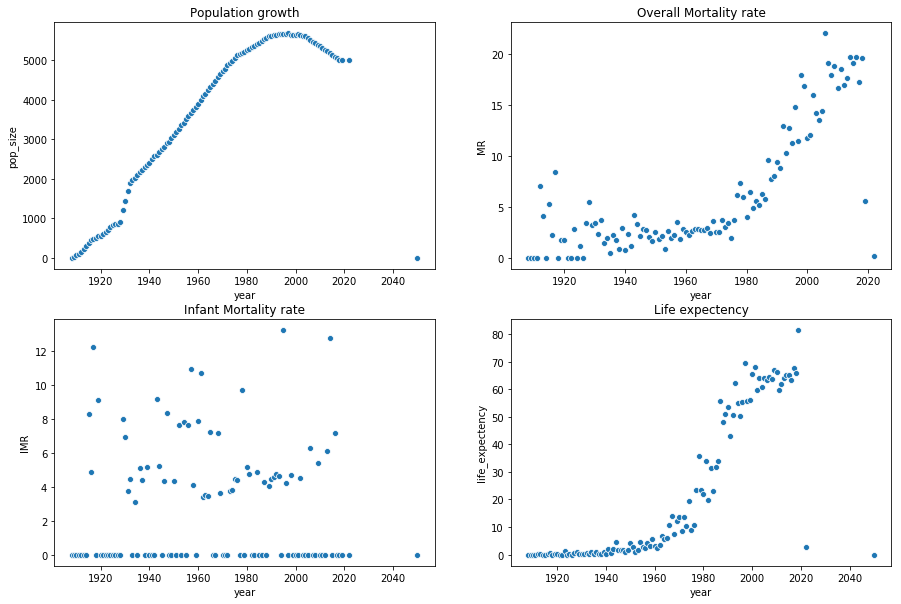

In [49]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(221)
sns.scatterplot(overall_pop_metrics.index,overall_pop_metrics.pop_size)
plt.gca().set_title('Population growth')
fig.add_subplot(222)
sns.scatterplot(overall_pop_metrics.index,overall_pop_metrics.MR)
plt.gca().set_title('Overall Mortality rate')
fig.add_subplot(223)
sns.scatterplot(overall_pop_metrics.index,overall_pop_metrics.IMR)
plt.gca().set_title('Infant Mortality rate')
fig.add_subplot(224)
sns.scatterplot(overall_pop_metrics.index,overall_pop_metrics.life_expectency)
plt.gca().set_title('Life expectency')
plt.show()

Ok! Thats quite informative.

1. Clearly there are health issues in Massandapolis. The population size has been decreasing since 2000's. 
2. There has been a steady increase in deaths since 1980s.
3. Also, I doubt before 1980, life expectency was 10 years. This looks like a data quality issue. I highly doubt the record keeping in the boomer age. Lets focus on patients after 1980.

In [50]:
#Pop-metrics by the gender
gender_pop_metrics = get_pop_summary('gender')
gender_pop_metrics.head()

birth  death  pop_size   MR  IMR   LE
year   gender                                       
1908.0 M        11.0    0.0      11.0  0.0  0.0  0.0
1909.0 F        22.0    0.0      22.0  0.0  0.0  0.0
1910.0 F        33.0    0.0      55.0  0.0  0.0  0.0
       M        11.0    0.0      22.0  0.0  0.0  0.0
1911.0 F        11.0    0.0      66.0  0.0  0.0  0.0

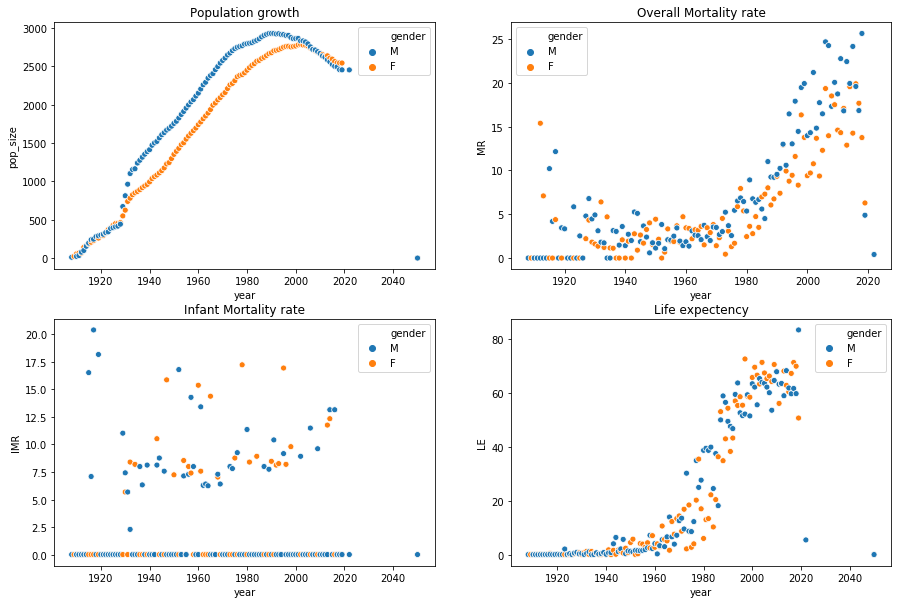

In [51]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(221)
sns.scatterplot(gender_pop_metrics.index.get_level_values(level = 'year'),gender_pop_metrics.pop_size,hue = gender_pop_metrics.index.get_level_values(level = 'gender'))
plt.gca().set_title('Population growth')
fig.add_subplot(222)
sns.scatterplot(gender_pop_metrics.index.get_level_values(level = 'year'),gender_pop_metrics.MR,hue = gender_pop_metrics.index.get_level_values(level = 'gender'))
plt.gca().set_title('Overall Mortality rate')
fig.add_subplot(223)
sns.scatterplot(gender_pop_metrics.index.get_level_values(level = 'year'),gender_pop_metrics.IMR,hue = gender_pop_metrics.index.get_level_values(level = 'gender'))
plt.gca().set_title('Infant Mortality rate')
fig.add_subplot(224)
sns.scatterplot(gender_pop_metrics.index.get_level_values(level = 'year'),gender_pop_metrics.LE,hue = gender_pop_metrics.index.get_level_values(level = 'gender'))
plt.gca().set_title('Life expectency')
plt.show()

Whatever it is, it is affecting both males and females. Both groups have decreased population size (after 2000) and both are experiencing higher mortality rates since 1980s.

In [52]:
#Pop-metrics by the race
race_pop_metrics = get_pop_summary('race')
race_pop_metrics.head()

birth  death  pop_size   MR  IMR   LE
year   race                                           
1908.0 white      11.0    0.0      11.0  0.0  0.0  0.0
1909.0 black      11.0    0.0      11.0  0.0  0.0  0.0
       white      11.0    0.0      22.0  0.0  0.0  0.0
1910.0 black      11.0    0.0      22.0  0.0  0.0  0.0
       hispanic   11.0    0.0      11.0  0.0  0.0  0.0

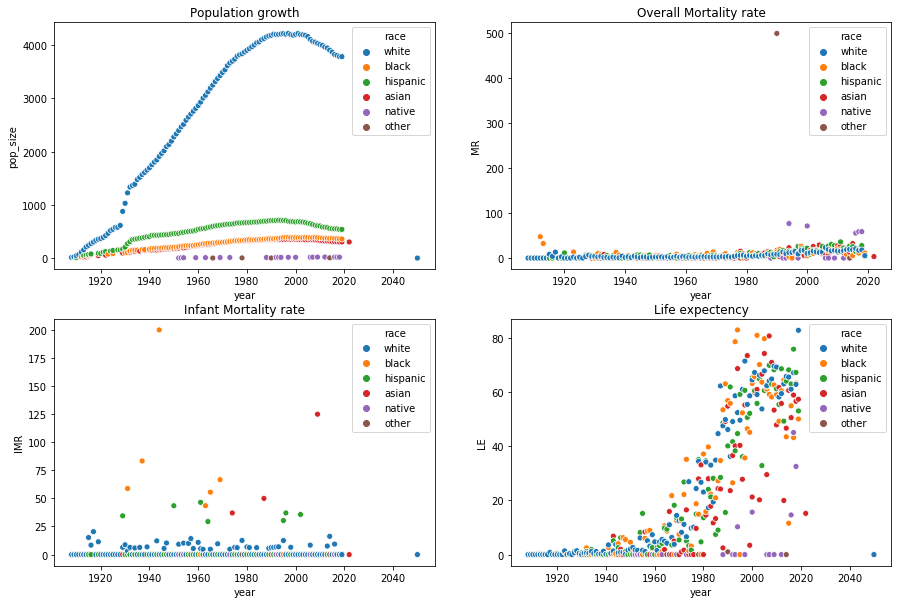

In [53]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(221)
sns.scatterplot(race_pop_metrics.index.get_level_values(level = 'year'),race_pop_metrics.pop_size,hue = race_pop_metrics.index.get_level_values(level = 'race'))
plt.gca().set_title('Population growth')
fig.add_subplot(222)
sns.scatterplot(race_pop_metrics.index.get_level_values(level = 'year'),race_pop_metrics.MR,hue = race_pop_metrics.index.get_level_values(level = 'race'))
plt.gca().set_title('Overall Mortality rate')
fig.add_subplot(223)
sns.scatterplot(race_pop_metrics.index.get_level_values(level = 'year'),race_pop_metrics.IMR,hue = race_pop_metrics.index.get_level_values(level = 'race'))
plt.gca().set_title('Infant Mortality rate')
fig.add_subplot(224)
sns.scatterplot(race_pop_metrics.index.get_level_values(level = 'year'),race_pop_metrics.LE,hue = race_pop_metrics.index.get_level_values(level = 'race'))
plt.gca().set_title('Life expectency')
plt.show()

The decrease is happening mostly in the white and hispanic groups.

In [54]:
#Pop-metrics by the ethnicity
ethnicity_pop_metrics = get_pop_summary('ethnicity')
ethnicity_pop_metrics.head()

birth  death  pop_size   MR  IMR   LE
year   ethnicity                                              
1908.0 french_canadian    11.0    0.0      11.0  0.0  0.0  0.0
1909.0 african            11.0    0.0      11.0  0.0  0.0  0.0
       italian            11.0    0.0      11.0  0.0  0.0  0.0
1910.0 central_american   11.0    0.0      11.0  0.0  0.0  0.0
       german             11.0    0.0      11.0  0.0  0.0  0.0

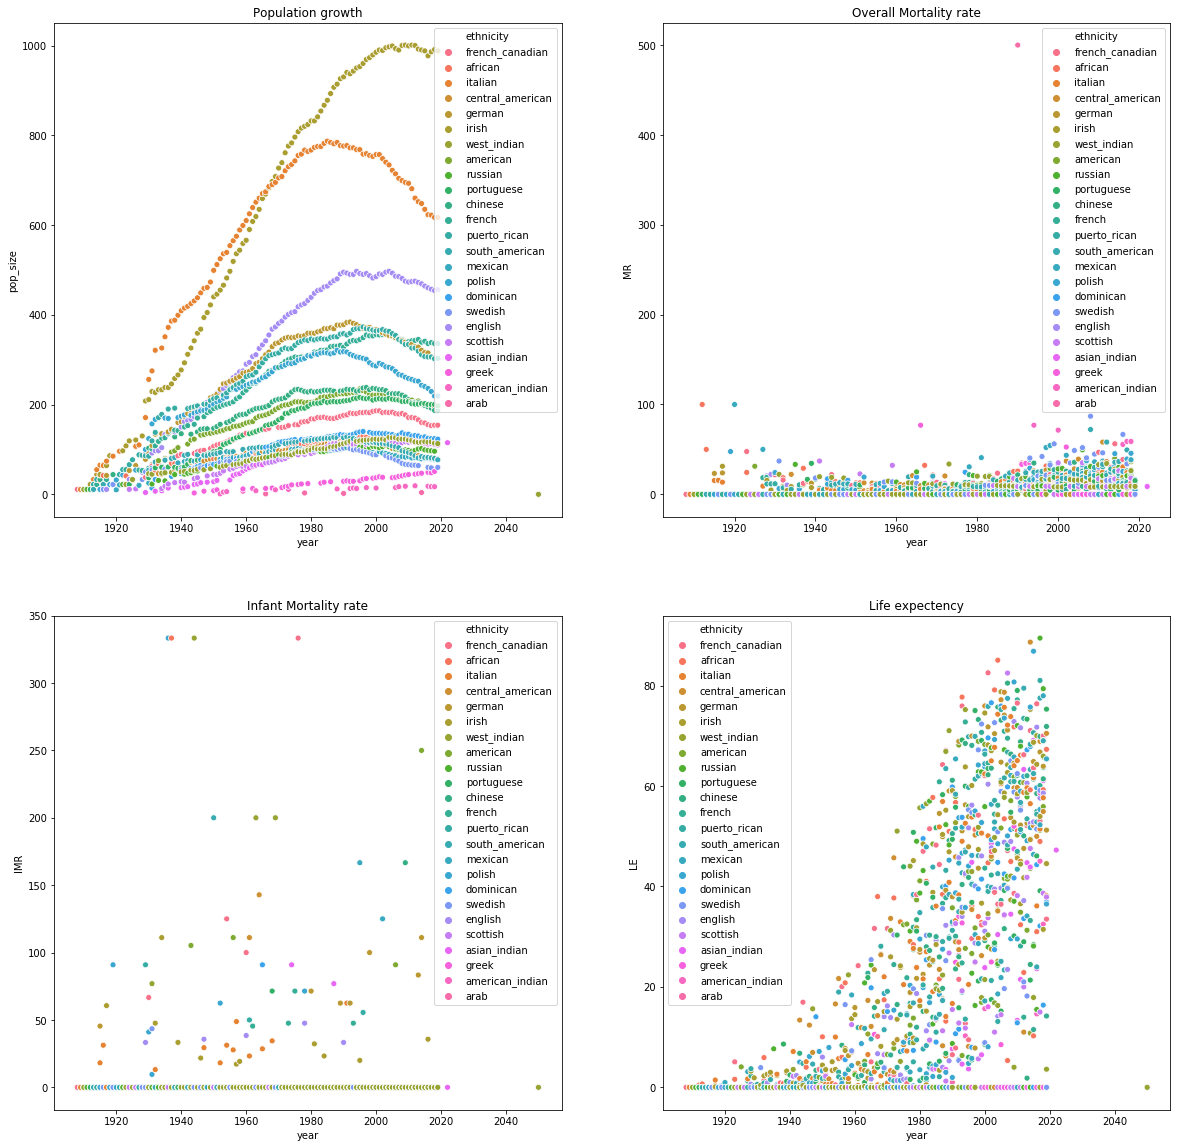

In [55]:
fig = plt.figure(figsize = (20,20))
fig.add_subplot(221)
sns.scatterplot(ethnicity_pop_metrics.index.get_level_values(level = 'year'),ethnicity_pop_metrics.pop_size,hue = ethnicity_pop_metrics.index.get_level_values(level = 'ethnicity'))
plt.gca().set_title('Population growth')
fig.add_subplot(222)
sns.scatterplot(ethnicity_pop_metrics.index.get_level_values(level = 'year'),ethnicity_pop_metrics.MR,hue = ethnicity_pop_metrics.index.get_level_values(level = 'ethnicity'))
plt.gca().set_title('Overall Mortality rate')
fig.add_subplot(223)
sns.scatterplot(ethnicity_pop_metrics.index.get_level_values(level = 'year'),ethnicity_pop_metrics.IMR,hue = ethnicity_pop_metrics.index.get_level_values(level = 'ethnicity'))
plt.gca().set_title('Infant Mortality rate')
fig.add_subplot(224)
sns.scatterplot(ethnicity_pop_metrics.index.get_level_values(level = 'year'),ethnicity_pop_metrics.LE,hue = ethnicity_pop_metrics.index.get_level_values(level = 'ethnicity'))
plt.gca().set_title('Life expectency')
plt.show()

Ok. Irish guys have been doing good. Despite all other groups dying, the irish population has been increasign ever since.

### Summary insights

- We'll consider patients who were born after 1980.
- The population has been decreasing since 2000s.
- There has been an almost linear increase in the mortality rates since 1980.
- There are duplicate ssn's (90 patients - 45 pairs)
- A few mis-reported DOB/ Date of deaths.
- Irish people have been largely unaffected while other groups' population has been declining.

In [57]:
patients.to_csv('patients_updated.csv',index = False)